## 1. Import Basic Libaries

In [1]:
# Import Lib
import os
import glob
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from PIL import Image
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, Flatten, BatchNormalization, Dropout



In [2]:
file=r"data.xlsx"
df=pd.read_excel(file)

In [3]:
df=df.iloc[:,1:]

In [4]:
y=df.iloc[:,:1]
X=df.iloc[:,1:]

In [5]:
X

,green,red,re,nir,SR,GCI,RECI,NDVI,GNDVI,GRVI,...,SEM_ph,COR_ph,MEA_TC,VAR_TC,HOM_TC,CON_TC,DIS_TC,ENT_TC,SEM_TC,COR_TC
0,0.305927,0.225867,0.412826,0.730970,3.414195,1.432788,0.793459,0.528345,0.408861,0.157818,...,0.148745,0.359922,55.068362,0.013086,0.986461,0.027077,0.027077,0.072596,0.955856,0.949291
1,0.302413,0.215713,0.421473,0.817534,3.921349,1.738320,0.974703,0.583133,0.459681,0.172067,...,0.199430,0.407549,55.259583,0.029678,0.970461,0.059077,0.059077,0.158979,0.901857,0.898536
2,0.297796,0.217997,0.426839,0.832479,4.001007,1.839262,0.980590,0.586153,0.472592,0.161862,...,0.229408,0.453808,55.733918,0.064268,0.935696,0.128607,0.128607,0.342104,0.789982,0.763161
3,0.284860,0.206094,0.427642,0.842002,4.256836,2.005776,1.000327,0.607186,0.494139,0.165797,...,0.207789,0.440908,55.890089,0.084179,0.916628,0.166744,0.166744,0.435482,0.734368,0.721034
4,0.310163,0.228752,0.402910,0.805792,3.643940,1.628329,1.041097,0.558620,0.443763,0.156026,...,0.246812,0.458775,55.576097,0.029652,0.970224,0.059552,0.059552,0.159609,0.901290,0.894909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.273749,0.209805,0.424445,0.900411,4.595129,2.352131,1.142207,0.627174,0.534138,0.146715,...,0.120423,0.428457,55.929451,0.082677,0.914994,0.170013,0.170013,0.434399,0.732592,0.700623
946,0.279598,0.214255,0.405390,0.835929,4.145372,2.040153,1.076633,0.594763,0.498594,0.143298,...,0.124716,0.431227,55.770597,0.080992,0.914235,0.171531,0.171531,0.436229,0.726982,0.705692
947,0.267603,0.212757,0.476858,0.916842,4.571058,2.485036,0.942473,0.626775,0.547338,0.126745,...,0.120600,0.437926,55.472543,0.069928,0.927136,0.146174,0.145802,0.356311,0.779573,0.809574
948,0.269407,0.209333,0.455743,0.895035,4.531546,2.372726,0.983457,0.624648,0.536808,0.138083,...,0.118885,0.430779,55.531209,0.068084,0.929904,0.140192,0.140192,0.341000,0.788687,0.816965


In [6]:
X.iloc[:,23:24]


,Tc
0,42.432564
1,34.619382
2,37.237802
3,37.808730
4,36.480814
...,...
945,38.170703
946,37.338641
947,35.163328
948,35.964172


In [7]:
X_Spectral=X.iloc[:,:21]
X_structure=X.iloc[:,21:23]
X_thermal=X.iloc[:,23:24]
X_texture=X.iloc[:,24:]

## 4. DNN Model building and validation using different features as input variables

###  Build a customized DNN architecture

In [8]:
from keras.layers import Input, Concatenate, Dense
from keras.models import Model
from keras.optimizers import Adam
#from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization

from keras.layers import Dropout
from sklearn.model_selection import train_test_split
import numpy as np


X_train_spectral, X_test_spectral, X_train_structure, X_test_structure, X_train_thermal, X_test_thermal, X_train_texture, X_test_texture, y_train, y_test = train_test_split(
  X_Spectral, X_structure, X_thermal, X_texture, y, test_size=0.3, random_state=42)
np.random.seed(42)
from sklearn.model_selection import train_test_split


# Define input layers for each feature subset
input_spectral = Input(shape=(X_train_spectral.shape[1],), name='input_spectral')
input_structure = Input(shape=(X_train_structure.shape[1],), name='input_structure')
input_thermal = Input(shape=(X_train_thermal.shape[1],), name='input_thermal')
input_texture = Input(shape=(X_train_texture.shape[1],), name='input_texture')

# Concatenate input layers
concatenated = Concatenate()([input_spectral, input_structure, input_thermal, input_texture])

# Define the rest of the model
dense1 = Dense(64, activation='relu')(concatenated)
dense2 = Dense(128, activation='relu')(dense1)
batch_norm = BatchNormalization()(dense2)
dense3 = Dense(256, activation='relu')(batch_norm)
dense4 = Dense(512, activation='relu')(dense3)
batch_norm2 = BatchNormalization()(dense4)
dense5 = Dense(512, activation='relu')(batch_norm2)
dense6 = Dense(1024, activation='relu')(dense5)
batch_norm3 = BatchNormalization()(dense6)
dropout = Dropout(0.1)(batch_norm3)
output_layer = Dense(1, activation='linear')(dropout)

# Define the model
my_dnn_model = Model(inputs=[input_spectral, input_structure, input_thermal, input_texture], outputs=output_layer)
my_dnn_model.summary()

# Compile the model
batch_size = 24
learn_rate = 0.001
opt = Adam(learning_rate=learn_rate)
epochs = 200
my_dnn_model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mean_absolute_error'])

# Train the model
history = my_dnn_model.fit({'input_spectral': X_train_spectral, 'input_structure': X_train_structure, 
                            'input_thermal': X_train_thermal, 'input_texture': X_train_texture}, 
                           y_train, epochs=epochs, batch_size=batch_size, validation_split=0.25, verbose=1)



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_spectral (InputLayer  [(None, 21)]                 0         []                            
 )                                                                                                
                                                                                                  
 input_structure (InputLaye  [(None, 2)]                  0         []                            
 r)                                                                                               
                                                                                                  
 input_thermal (InputLayer)  [(None, 1)]                  0         []                            
                                                                                             

Epoch 16/200
21/21 [==============================] - 1s 29ms/step - loss: 7965171.0000 - mean_absolute_error: 2761.0024 - val_loss: 8569403.0000 - val_mean_absolute_error: 2839.1689
Epoch 17/200
21/21 [==============================] - 1s 27ms/step - loss: 7783662.0000 - mean_absolute_error: 2733.1013 - val_loss: 10736084.0000 - val_mean_absolute_error: 3215.6917
Epoch 18/200
21/21 [==============================] - 1s 29ms/step - loss: 7629744.0000 - mean_absolute_error: 2703.6580 - val_loss: 9758886.0000 - val_mean_absolute_error: 3049.4109
Epoch 19/200
21/21 [==============================] - 1s 28ms/step - loss: 7432878.0000 - mean_absolute_error: 2672.2527 - val_loss: 9612546.0000 - val_mean_absolute_error: 3041.3503
Epoch 20/200
21/21 [==============================] - 1s 28ms/step - loss: 7247147.0000 - mean_absolute_error: 2639.9492 - val_loss: 10682785.0000 - val_mean_absolute_error: 3206.8054
Epoch 21/200
21/21 [==============================] - 1s 28ms/step - loss: 7086435.

Epoch 61/200
21/21 [==============================] - 1s 33ms/step - loss: 549140.0000 - mean_absolute_error: 636.4888 - val_loss: 1467326.1250 - val_mean_absolute_error: 977.1638
Epoch 62/200
21/21 [==============================] - 1s 29ms/step - loss: 472749.8125 - mean_absolute_error: 602.6062 - val_loss: 840351.6875 - val_mean_absolute_error: 738.8162
Epoch 63/200
21/21 [==============================] - 1s 30ms/step - loss: 451016.0625 - mean_absolute_error: 578.2015 - val_loss: 846682.1250 - val_mean_absolute_error: 751.2837
Epoch 64/200
21/21 [==============================] - 0s 23ms/step - loss: 380449.3438 - mean_absolute_error: 531.6047 - val_loss: 1613772.2500 - val_mean_absolute_error: 1128.5178
Epoch 65/200
21/21 [==============================] - 1s 23ms/step - loss: 360800.6250 - mean_absolute_error: 506.0444 - val_loss: 943102.6875 - val_mean_absolute_error: 827.8846
Epoch 66/200
21/21 [==============================] - 1s 29ms/step - loss: 318581.5000 - mean_absolute

Epoch 107/200
21/21 [==============================] - 1s 35ms/step - loss: 103366.5312 - mean_absolute_error: 251.7593 - val_loss: 377150.9688 - val_mean_absolute_error: 464.1379
Epoch 108/200
21/21 [==============================] - 1s 33ms/step - loss: 109211.2812 - mean_absolute_error: 258.3085 - val_loss: 376150.2812 - val_mean_absolute_error: 469.0084
Epoch 109/200
21/21 [==============================] - 1s 33ms/step - loss: 85156.1719 - mean_absolute_error: 226.0376 - val_loss: 423473.7188 - val_mean_absolute_error: 492.9650
Epoch 110/200
21/21 [==============================] - 1s 33ms/step - loss: 106384.3906 - mean_absolute_error: 244.7211 - val_loss: 646669.4375 - val_mean_absolute_error: 638.1377
Epoch 111/200
21/21 [==============================] - 1s 38ms/step - loss: 111031.5000 - mean_absolute_error: 258.5878 - val_loss: 586843.8750 - val_mean_absolute_error: 584.1480
Epoch 112/200
21/21 [==============================] - 1s 32ms/step - loss: 90924.1250 - mean_absolut

Epoch 153/200
21/21 [==============================] - 1s 30ms/step - loss: 75627.9531 - mean_absolute_error: 209.1872 - val_loss: 383570.6250 - val_mean_absolute_error: 469.2559
Epoch 154/200
21/21 [==============================] - 1s 26ms/step - loss: 104244.0938 - mean_absolute_error: 242.2121 - val_loss: 403635.1562 - val_mean_absolute_error: 490.9627
Epoch 155/200
21/21 [==============================] - 1s 33ms/step - loss: 102169.6406 - mean_absolute_error: 243.2121 - val_loss: 611845.7500 - val_mean_absolute_error: 634.0640
Epoch 156/200
21/21 [==============================] - 1s 32ms/step - loss: 75323.0859 - mean_absolute_error: 213.5963 - val_loss: 566509.6250 - val_mean_absolute_error: 583.6898
Epoch 157/200
21/21 [==============================] - 1s 31ms/step - loss: 88260.9453 - mean_absolute_error: 232.5769 - val_loss: 502605.4688 - val_mean_absolute_error: 545.5583
Epoch 158/200
21/21 [==============================] - 1s 29ms/step - loss: 65934.0312 - mean_absolute_

Epoch 199/200
21/21 [==============================] - 1s 26ms/step - loss: 58185.2539 - mean_absolute_error: 185.0228 - val_loss: 663756.5000 - val_mean_absolute_error: 617.2098
Epoch 200/200
21/21 [==============================] - 1s 25ms/step - loss: 67244.2500 - mean_absolute_error: 198.7981 - val_loss: 526867.0625 - val_mean_absolute_error: 498.3851


### 4.1 DNN Model Training  and Testing

### 4.1.1 Model Training

In [9]:
# Define tunable parematers, this is just for reference.
#batch_size_list = [32,48,64,96,128]
# learn_rate_list = [0.001,0.003,0.005,0.007,0.009,0.01,0.03,0.05,0.07,0.09,0.1]
# dropout_rate_list = [0.20, 0.25, 0.30, 0.35,0.40,0.45,0.50,0.6,0.7,0.8,0.9]
# epochs_list = [100,200,250,300,400,500,1000]


### 4.1.2 Visulizing Model Training and Validation

In [10]:
# List all data in history
print(history.history.keys())

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


In [11]:
print(history.history.keys())

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


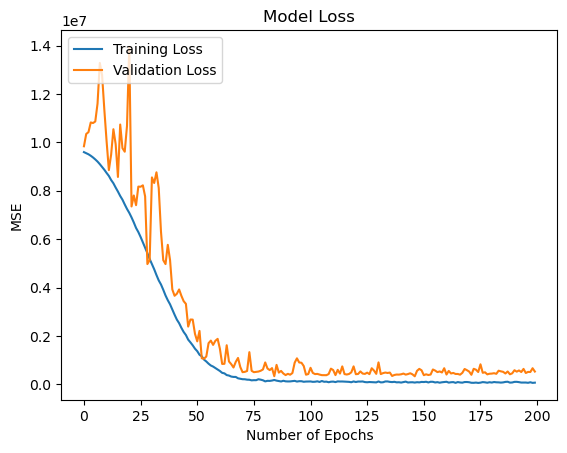

In [12]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title('Model Loss')
plt.ylabel("MSE")
plt.xlabel("Number of Epochs")
plt.legend( loc=  "upper left")
plt.show()

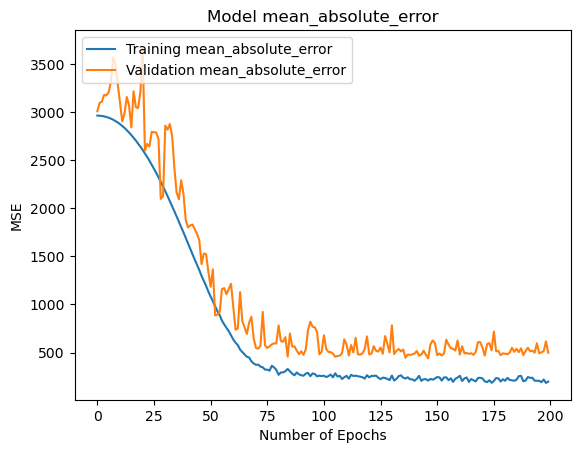

In [13]:
plt.plot(history.history["mean_absolute_error"], label="Training mean_absolute_error")
plt.plot(history.history["val_mean_absolute_error"], label="Validation mean_absolute_error")
plt.title('Model mean_absolute_error')
plt.ylabel("MSE")
plt.xlabel("Number of Epochs")
plt.legend( loc=  "upper left")
plt.show()

### 4.1.3 Model Evaluation

21/21 [==============================] - 0s 5ms/step
Training Set Evaluation:
Mean Squared Error (MSE): 229262.610
Mean Absolute Error (MAE): 336.711
R-squared (R2) Score: 0.726
9/9 [==============================] - 0s 9ms/step

Testing Set Evaluation:
Mean Squared Error (MSE): 347194.473
Mean Absolute Error (MAE): 445.138
R-squared (R2) Score: 0.558

Plotting Results:


C:\Users\adeba\AppData\Local\Temp\ipykernel_31792\4075882826.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  text=r'R2 =%.2f' %(r2_dnn)+ "\n"; text +=r'RMSE = %.2f' % (rmse_dnn); text+="\n"; text +=r"RRMSE = %.2f" % (rrmse_dnn) + '%'


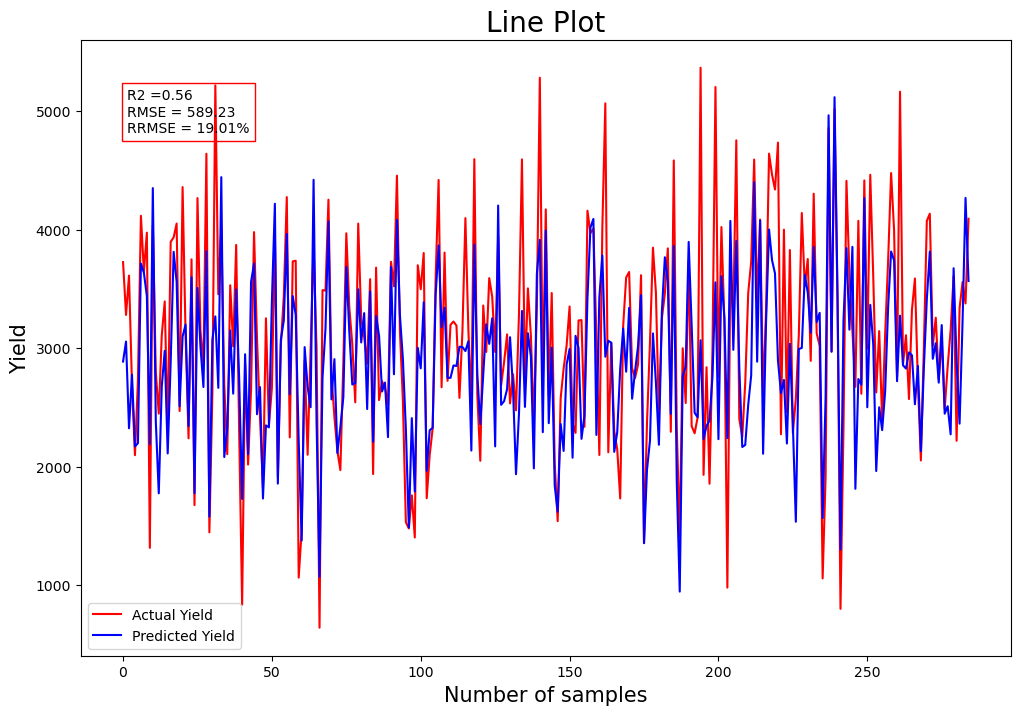

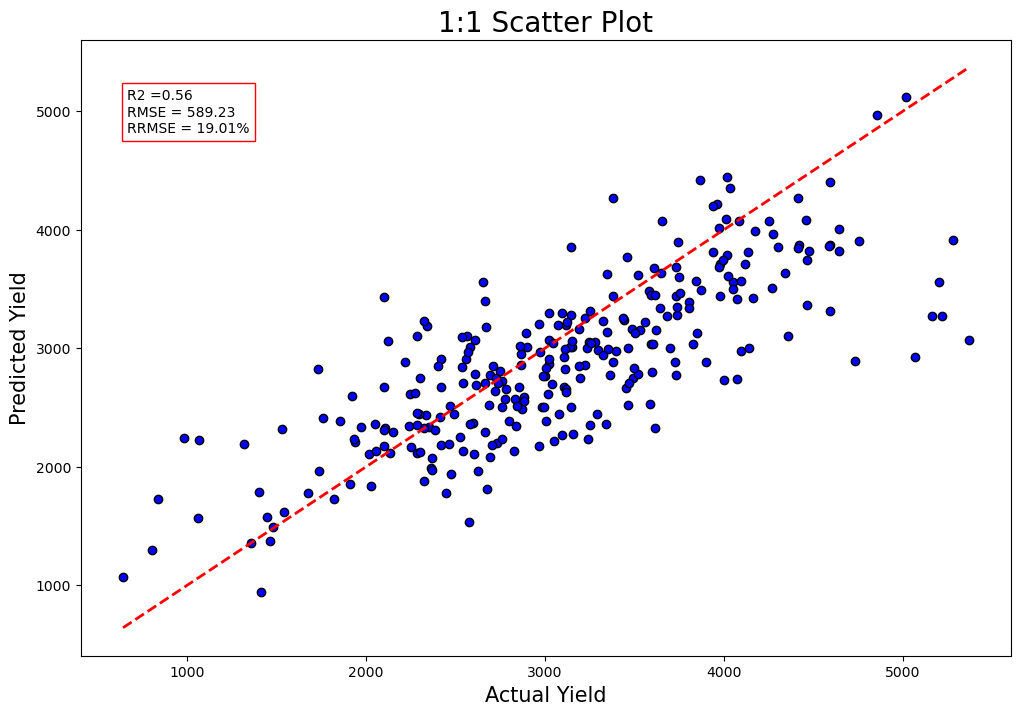

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Evaluate model using training dataset
predictions_train = my_dnn_model.predict({'input_spectral': X_train_spectral, 'input_structure': X_train_structure, 
                                           'input_thermal': X_train_thermal, 'input_texture': X_train_texture})

print("Training Set Evaluation:")
print("Mean Squared Error (MSE): %.3f" % mean_squared_error(y_train, predictions_train))
print("Mean Absolute Error (MAE): %.3f" % mean_absolute_error(y_train, predictions_train))
print("R-squared (R2) Score: %.3f" % r2_score(y_train, predictions_train))

# Evaluate model using testing dataset
predictions_test = my_dnn_model.predict({'input_spectral': X_test_spectral, 'input_structure': X_test_structure, 
                                          'input_thermal': X_test_thermal, 'input_texture': X_test_texture})

print("\nTesting Set Evaluation:")
print("Mean Squared Error (MSE): %.3f" % mean_squared_error(y_test, predictions_test))
print("Mean Absolute Error (MAE): %.3f" % mean_absolute_error(y_test, predictions_test))
print("R-squared (R2) Score: %.3f" % r2_score(y_test, predictions_test))

# Plotting
mse_dnn = mean_squared_error(y_test, predictions_test)
rmse_dnn = np.sqrt(mse_dnn)
rrmse_dnn = rmse_dnn * 100 / y_test.mean()
r2_dnn = r2_score(y_test, predictions_test)

print("\nPlotting Results:")
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(list(range(0, len(y_test))), y_test, color='r', label='Actual Yield')
plt.plot(list(range(0, len(y_test))), predictions_test, color='b', label='Predicted Yield')
#text = f'R2 = {r2_dnn:.2f}\nRMSE = {rmse_dnn:.2f}\nRRMSE = {rrmse_dnn:.2f}%'
text=r'R2 =%.2f' %(r2_dnn)+ "\n"; text +=r'RMSE = %.2f' % (rmse_dnn); text+="\n"; text +=r"RRMSE = %.2f" % (rrmse_dnn) + '%'

plt.annotate(text, xy=(0.05, 0.85), xycoords='axes fraction', color='black', fontsize=10,
             bbox=dict(facecolor='none', edgecolor='red'))
ax.set_xlabel('Number of samples', fontsize=15)
ax.set_ylabel('Yield', fontsize=15)
ax.set_title('Line Plot', fontsize=20)
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(y_test, predictions_test, color='b', edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.annotate(text, xy=(0.05, 0.85), xycoords='axes fraction', color='black', fontsize=10,
             bbox=dict(facecolor='none', edgecolor='red'))
ax.set_xlabel('Actual Yield', fontsize=15)
ax.set_ylabel('Predicted Yield', fontsize=15)
ax.set_title('1:1 Scatter Plot', fontsize=20)
plt.show()
